# **1. Import Library**

In [1]:
# Aljabar linear dan Manipulasi Data
import pandas as pd  # Pandas untuk manipulasi dan analisis data
import numpy as np  # NumPy untuk komputasi numerik

# Label Sentimen Lexicon
import csv
import requests
from io import StringIO
 
# Teks Preprocessing
import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

# EDA dan Visualisasi
from collections import Counter
from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

# Normalisasi dan Splitting
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Ekstraksi Fitur
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

#avaluasi
from sklearn.metrics import classification_report, confusion_matrix

# NLP
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.

2025-03-30 06:53:30.278560: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743292411.084898   64017 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743292411.307245   64017 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743292413.276255   64017 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743292413.276286   64017 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743292413.276289   64017 computation_placer.cc:177] computation placer alr

True

# **2. Memuat Dataset**

In [2]:
path = '/mnt/d/Artificial Intellegence/Machine Learning/CodingCamp/Proyek Analisis Sentimen/Telkom_Reviews.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,be972f04-d9a5-453f-8720-6fb16bddbfc8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sangat membantu sekali,5,0,NaN,2025-03-28 18:26:22,"Hai Kak Myda, terima kasih tetap setia menggun...",2025-03-28 20:22:27,NaN
1,ec73049e-b2c9-4234-b225-830810baedbd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,👍🏼👍🏼👍🏼,5,0,8.6.2,2025-03-28 18:24:34,"Hai Kak Atikah, terima kasih tetap setia mengg...",2025-03-28 20:22:51,8.6.2
2,cfda6415-f03d-445e-a72a-35406489cac2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tefap setia dengan telkomsel 20 tabun terakhir...,5,0,8.6.2,2025-03-28 18:22:42,NaN,NaN,8.6.2
3,f0df2a77-cddd-480a-ac1a-15382f8fd41c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap,5,0,8.6.2,2025-03-28 18:20:58,"Hai Kak Akmal, terima kasih tetap setia menggu...",2025-03-28 20:23:11,8.6.2
4,4e738874-830a-4e8d-868c-ccb39a482b92,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,PROVIDER PARAH GADA SINYAL DI DAERAH TRITIH LO...,1,0,NaN,2025-03-28 18:19:34,"Hai Kak Delius, Mohon maaf untuk ketidaknyaman...",2025-03-28 18:55:21,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              50000 non-null  object
 1   userName              50000 non-null  object
 2   userImage             50000 non-null  object
 3   content               50000 non-null  object
 4   score                 50000 non-null  int64 
 5   thumbsUpCount         50000 non-null  int64 
 6   reviewCreatedVersion  38412 non-null  object
 7   at                    50000 non-null  object
 8   replyContent          27745 non-null  object
 9   repliedAt             27745 non-null  object
 10  appVersion            38412 non-null  object
dtypes: int64(2), object(9)
memory usage: 4.2+ MB


# 3. Data Wrangling

In [5]:
clean_df = df.dropna()

In [6]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()
 
# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

In [7]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21405 entries, 1 to 49997
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              21405 non-null  object
 1   userName              21405 non-null  object
 2   userImage             21405 non-null  object
 3   content               21405 non-null  object
 4   score                 21405 non-null  int64 
 5   thumbsUpCount         21405 non-null  int64 
 6   reviewCreatedVersion  21405 non-null  object
 7   at                    21405 non-null  object
 8   replyContent          21405 non-null  object
 9   repliedAt             21405 non-null  object
 10  appVersion            21405 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.0+ MB


# 4. Text Preprocessing

In [8]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
 
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text
 
def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text
 
def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text
 
def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text
 
def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
 
    # Memecah teks menjadi daftar kata
    words = text.split()
 
    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]
 
    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)
 
    return stemmed_text
 
def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [9]:
slangwords = {
    "@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar",
    "bgt": "banget", "maks": "maksimal", "blm": "belum", "tdk": "tidak", "gk": "nggak", "ga": "nggak",
    "trs": "terus", "udh": "sudah", "dgn": "dengan", "tp": "tapi", "krn": "karena", "dg": "dengan",
    "sm": "sama", "jg": "juga", "lg": "lagi", "sbnrnya": "sebenarnya", "skrg": "sekarang",
    "klo": "kalau", "kl": "kalau", "dr": "dari", "jd": "jadi", "trnyata": "ternyata",
    "td": "tadi", "msh": "masih", "spt": "seperti", "sy": "saya", "gw": "saya", "gue": "saya",
    "elo": "kamu", "lu": "kamu", "lo": "kamu", "ane": "saya", "ente": "kamu", "y": "ya",
    "tdk": "tidak", "ok": "oke", "okey": "oke", "wkwk": "", "haha": "", "hehe": "", "hihi": "",
    "cm": "cuma", "aja": "saja", "ampun": "", "plz": "tolong", "brb": "sebentar", "ttyl": "nanti ngobrol lagi",
    "thx": "terima kasih", "ty": "terima kasih", "gmn": "gimana", "gimana": "bagaimana",
    "btw": "ngomong-ngomong", "fyi": "untuk informasi", "yg": "yang", "dl": "dulu",
    "bsk": "besok", "sblm": "sebelum", "pke": "pakai", "sbnr": "sebenarnya", "kmrn": "kemarin",
    "omg": "ya Tuhan", "wkwkwk": "", "cmn": "cuman", "jdwl": "jadwal", "ngga": "tidak",
    "sbnrnya": "sebenarnya", "maaciw": "terima kasih", "cuan": "keuntungan", "yey": "senang"
}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []
 
    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)
 
    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [10]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)
 
# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)
 
# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)
 
# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)
 
# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)
 
# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [11]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
1,ec73049e-b2c9-4234-b225-830810baedbd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,👍🏼👍🏼👍🏼,5,0,8.6.2,2025-03-28 18:24:34,"Hai Kak Atikah, terima kasih tetap setia mengg...",2025-03-28 20:22:51,8.6.2,,,,[],[],
3,f0df2a77-cddd-480a-ac1a-15382f8fd41c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap,5,0,8.6.2,2025-03-28 18:20:58,"Hai Kak Akmal, terima kasih tetap setia menggu...",2025-03-28 20:23:11,8.6.2,mantap,mantap,mantap,[mantap],[mantap],mantap
5,bb33fb7e-27b0-44f6-9871-e2662dbf46a9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,keren #sempurna,5,0,8.6.2,2025-03-28 18:18:35,"Hai Kak Hafid, terima kasih tetap setia menggu...",2025-03-28 20:23:39,8.6.2,keren,keren,keren,[keren],[keren],keren
6,2aa8fb60-7899-41a8-9cca-54c186ddc945,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kualitas jaringan makin buruk,3,0,8.6.2,2025-03-28 18:17:43,"Hai Kak. Mohon maaf untuk ketidaknyamanannya, ...",2025-03-29 09:10:19,8.6.2,kualitas jaringan makin buruk,kualitas jaringan makin buruk,kualitas jaringan makin buruk,"[kualitas, jaringan, makin, buruk]","[kualitas, jaringan, buruk]",kualitas jaringan buruk
9,0f53d03e-6728-49b4-87b4-1c0425dada6b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"mahal semua paket nya, mana ngelag bnr sinyal ny",1,0,8.6.2,2025-03-28 18:07:02,"Hai Kak. Mohon maaf untuk ketidaknyamanannya, ...",2025-03-24 17:14:21,8.6.2,mahal semua paket nya mana ngelag bnr sinyal ny,mahal semua paket nya mana ngelag bnr sinyal ny,mahal semua paket nya mana ngelag bnr sinyal ny,"[mahal, semua, paket, nya, mana, ngelag, bnr, ...","[mahal, paket, ngelag, bnr, sinyal, ny]",mahal paket ngelag bnr sinyal ny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,f2b59978-4d04-4986-beee-a3376eef3be4,Moh reza,https://play-lh.googleusercontent.com/a/ACg8oc...,mantab makin update makin banyak bug nya kadan...,1,0,8.6.1,2025-01-04 19:36:07,"Hai, Kak Reza. Mohon maaf untuk ketidaknyamana...",2025-02-13 19:28:03,8.6.1,mantab makin update makin banyak bug nya kadan...,mantab makin update makin banyak bug nya kadan...,mantab makin update makin banyak bug nya kadan...,"[mantab, makin, update, makin, banyak, bug, ny...","[mantab, update, bug, kadang, lelet, banget, k...",mantab update bug kadang lelet banget kadang f...
49993,08673253-ffd3-43a8-987c-384d1cd55ca2,Ocha Hatiasri Syarafina,https://play-lh.googleusercontent.com/a-/ALV-U...,Beberapa Minggu ini aplikasi my Telkomsel tida...,2,0,8.6.1,2025-01-04 19:33:33,Hai Kak Ocha. Mohon maaf untuk ketidaknyamanan...,2025-03-07 12:57:21,8.6.1,Beberapa Minggu ini aplikasi my Telkomsel tida...,beberapa minggu ini aplikasi my telkomsel tida...,beberapa minggu ini aplikasi my telkomsel tida...,"[beberapa, minggu, ini, aplikasi, my, telkomse...","[minggu, aplikasi, telkomsel, dibuka, versi, t...",minggu aplikasi telkomsel dibuka versi terbaru...
49995,8bdff644-1c73-4c8a-88e1-24d4c9029bc3,Ilham Ramadhani Saputro,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi force close terus,1,0,8.6.1,2025-01-04 19:30:31,"Hai, Kak Ilham. Mohon maaf untuk ketidaknyaman...",2025-02-08 18:24:02,8.6.1,Aplikasi force close terus,aplikasi force close terus,aplikasi force close terus,"[aplikasi, force, close, terus]","[aplikasi, force, close]",aplikasi force close
49996,1e6a0ab9-163b-4369-afce-d910bf3fbbf1,Yudha Satria,https://play-lh.googleusercontent.com/a-/ALV-U...,banyak bug nya,1,0,8.6.1,2025-01-04 19:30:31,"Hai, Kak Yudha. Mohon maaf untuk ketidaknyaman...",2025-01-17 08:56:18,8.6.1,banyak bug nya,banyak bug nya,banyak bug nya,"[banyak, bug, nya]",[bug],bug


In [12]:
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
 
if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
 
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")
 
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
 
if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
 
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [13]:
# Fungsi untuk menentukan polaritas sentimen dari teks
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if word in lexicon_positive:
            score += lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if word in lexicon_negative:
            score += lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity = ''
    # Inisialisasi variabel polaritas

    # Menambahkan kategori netral
    if score > 0:
        polarity = 'positive'
        # Jika skor sentimen lebih besar dari 0, maka polaritas adalah positif
    elif score < 0:
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
    else:
        polarity = 'neutral'
        # Jika skor sentimen sama dengan 0, maka polaritas adalah netral

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [14]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    14102
positive     4296
neutral      3007
Name: count, dtype: int64


# **Exploratory Data Analysis (EDA)**

#### Panjang teks

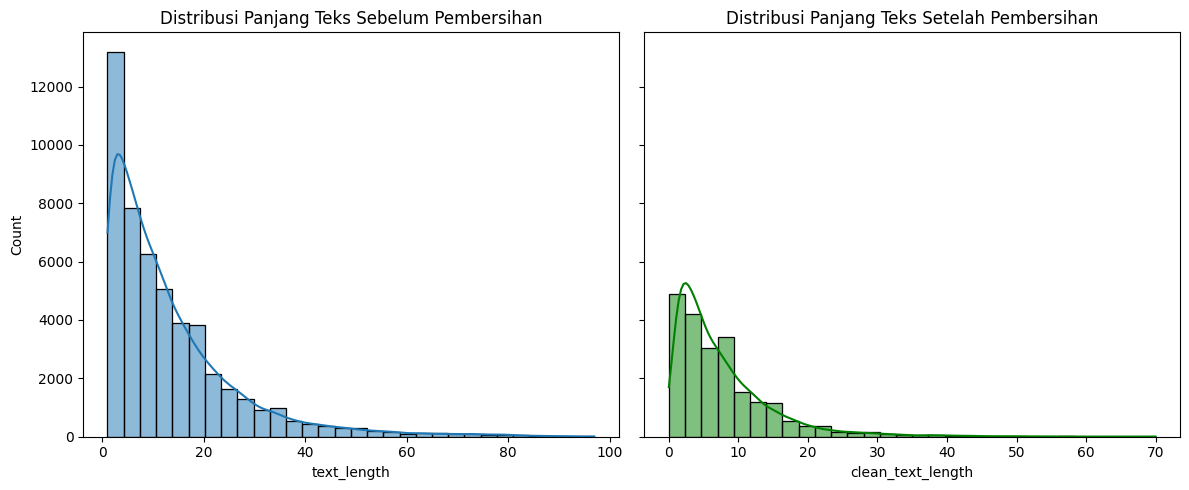

In [15]:
# Pastikan kolom yang digunakan ada di DataFrame
df['text_length'] = df['content'].apply(lambda x: len(str(x).split()))
clean_df['clean_text_length'] = clean_df['text_akhir'].apply(lambda x: len(str(x).split()))

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Histogram panjang teks sebelum pembersihan
sns.histplot(df['text_length'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Distribusi Panjang Teks Sebelum Pembersihan")

# Histogram panjang teks setelah pembersihan
sns.histplot(clean_df['clean_text_length'], bins=30, kde=True, color='green', ax=axes[1])
axes[1].set_title("Distribusi Panjang Teks Setelah Pembersihan")

plt.tight_layout()
plt.show()


#### Kata paling sering muncul

/tmp/ipykernel_64017/2591610383.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=common_words['word'], x=common_words['count'], palette='coolwarm')


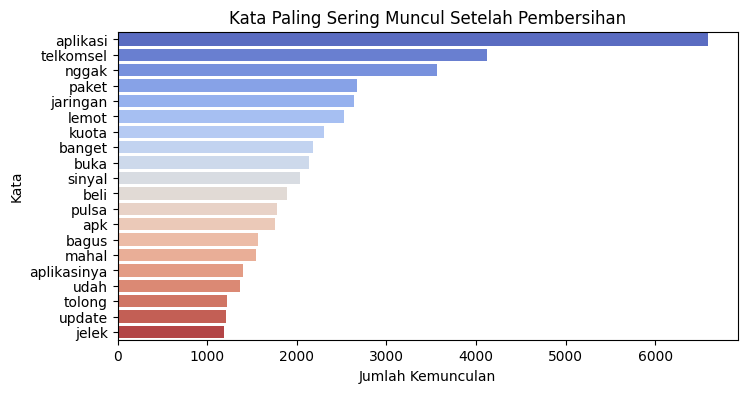

In [16]:
all_clean_text = " ".join(clean_df['text_akhir'])

# Hitung kata yang paling sering muncul
word_counts = Counter(all_clean_text.split())
common_words = pd.DataFrame(word_counts.most_common(20), columns=['word', 'count'])

# Plot bar chart
plt.figure(figsize=(8, 4))
sns.barplot(y=common_words['word'], x=common_words['count'], palette='coolwarm')
plt.title("Kata Paling Sering Muncul Setelah Pembersihan")
plt.xlabel("Jumlah Kemunculan")
plt.ylabel("Kata")
plt.show()

#### Distribusi Data per kelas

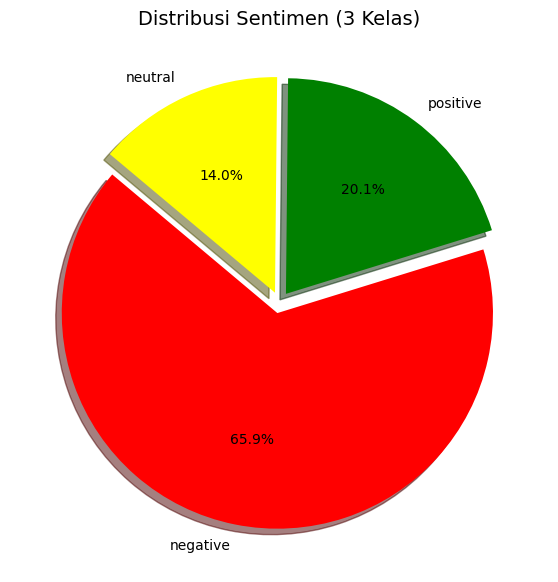

In [17]:
sentiment_counts = clean_df['polarity'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values

colors = ['red', 'green', 'yellow']
explode = [0.05] * len(labels)

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, explode=explode, shadow=True)
plt.title("Distribusi Sentimen (3 Kelas)", fontsize=14)
plt.show()

#### Word Cloud 3 Kelas

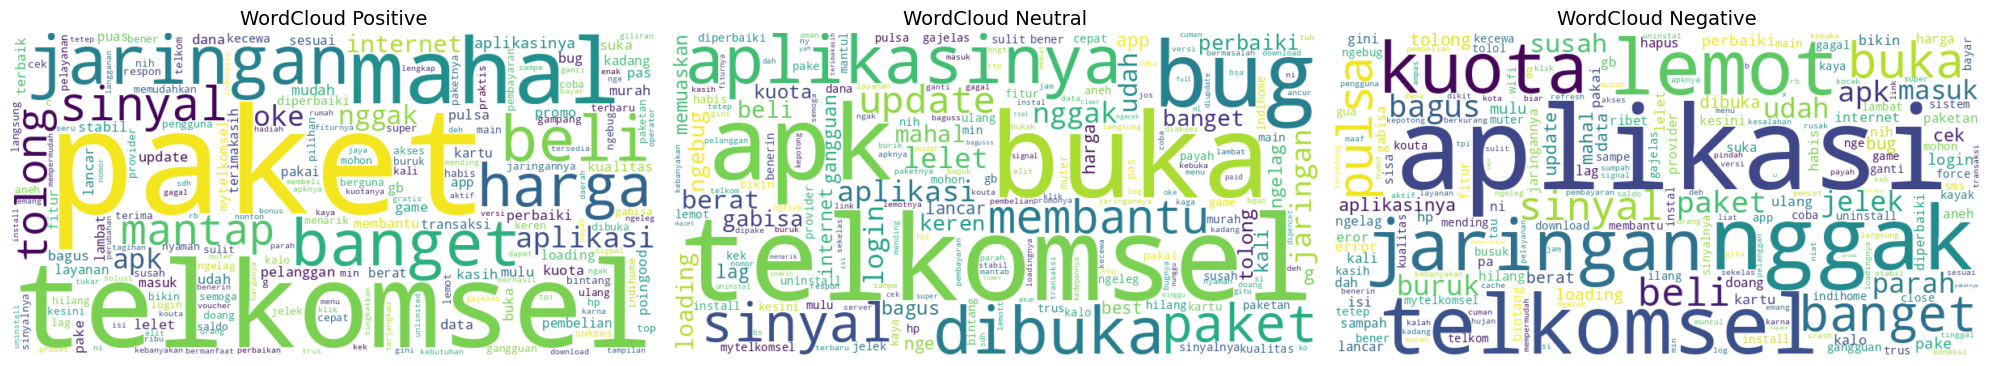

In [18]:
clean_df['text_cleaned'] = clean_df['text_stopword'].apply(lambda x: " ".join(x) if isinstance(x, list) else str(x)).fillna("")

sentiments = ['positive', 'neutral', 'negative']

wordclouds = {}
for sentiment in sentiments:
    text = " ".join(clean_df[clean_df['polarity'] == sentiment]['text_cleaned'])
    wordclouds[sentiment] = WordCloud(width=800, height=400, background_color='white', 
                                      max_words=200, collocations=False).generate(text)

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten() 

for i, sentiment in enumerate(sentiments):
    axes[i].imshow(wordclouds[sentiment], interpolation='bilinear')
    axes[i].axis("off")
    axes[i].set_title("WordCloud " + sentiment.capitalize(), fontsize=14)

if len(axes) > len(sentiments):
    for j in range(len(sentiments), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# **4.Data Splitting, Data Preprocessing dan Ekstraksi Fitur**

## 4.1. Preprocessing Data

In [19]:
# Siapkan data
texts = clean_df['text_akhir'].tolist()
labels = clean_df['polarity'].tolist()

# Encode label
le = LabelEncoder()
labels_enc = le.fit_transform(labels)
labels_cat = to_categorical(labels_enc)

## 4.2. Ekstraksi Fitur

### Word Embedding

In [20]:
# Tokenisasi
max_words = 20000  # batas kata terbanyak yang dipakai
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Padding sequences
max_len = 100  # panjang maksimal tiap sequence, bisa disesuaikan
X_seq = pad_sequences(sequences, maxlen=max_len)
y = labels_cat

### Word2Vec

In [21]:
tokenized_texts = [text.split() for text in texts]
embedding_dim = 128

w2v_model = Word2Vec(
    sentences=tokenized_texts,
    vector_size=embedding_dim,
    window=5,
    min_count=1,
    workers=4,
    seed=42
)

# Membuat embedding matrix untuk semua kata di tokenizer
word_index = tokenizer.word_index
embedding_matrix = np.zeros((min(max_words, len(word_index) + 1), embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        if word in w2v_model.wv:
            embedding_vector = w2v_model.wv[word]
            embedding_matrix[i] = embedding_vector

## 4.3. Data Splitting

### LSTM - Word Embedding - 70/30

In [22]:
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_seq, y, test_size=0.3, random_state=42, stratify=labels_enc)

### CNN - Word Embedding - 80/20

In [23]:
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(
    X_seq, y, test_size=0.2, random_state=42, stratify=labels_enc)

### LSTM - Word2Vec - 80/20

In [24]:
X_train_lstmw, X_test_lstmw, y_train_lstmw, y_test_lstmw = train_test_split(
    X_seq, y, test_size=0.2, random_state=42, stratify=labels_enc)

# **5. Membangun Model**

In [25]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model_lstm.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(3, activation='softmax'))
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.build(input_shape=(None, max_len))
model_lstm.summary()

/mnt/d/Artificial Intellegence/Machine Learning/CodingCamp/Proyek Analisis Sentimen/env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
W0000 00:00:1743292452.268597   64017 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,609,603 (9.95 MB)

 Trainable params: 2,609,603 (9.95 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model_cnn.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(3, activation='softmax'))
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.build(input_shape=(None, max_len))
model_cnn.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 96, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 48, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 44, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 22, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2816)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │       180,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,822,595 (10.77 MB)

 Trainable params: 2,822,595 (10.77 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model_lstmw = Sequential()
model_lstmw.add(Embedding(input_dim=embedding_matrix.shape[0],
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_len,
                    trainable=True))
model_lstmw.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model_lstmw.add(Dropout(0.2))
model_lstmw.add(Dense(3, activation='softmax'))
model_lstmw.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstmw.build(input_shape=(None, max_len))
model_lstmw.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 128)       │     1,888,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,937,731 (7.39 MB)

 Trainable params: 1,937,731 (7.39 MB)

 Non-trainable params: 0 (0.00 B)

# **5. Latih Model dan Early Stoping**

## 5.1. Early Stoping

In [28]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

## 5.2. Melatih Model

### LSTM Word Embedding

In [29]:
history = model_lstm.fit(X_train_lstm, y_train_lstm, 
                    epochs=10, 
                    batch_size=128, 
                    validation_split=0.1, 
                    callbacks=[early_stop])

Epoch 1/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.6607 - loss: 0.8433 - val_accuracy: 0.8612 - val_loss: 0.4019
Epoch 2/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.8909 - loss: 0.3272 - val_accuracy: 0.9133 - val_loss: 0.2514
Epoch 3/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.9488 - loss: 0.1546 - val_accuracy: 0.9166 - val_loss: 0.2421
Epoch 4/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.9640 - loss: 0.1042 - val_accuracy: 0.9199 - val_loss: 0.2401
Epoch 5/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.9738 - loss: 0.0746 - val_accuracy: 0.9153 - val_loss: 0.2725
Epoch 6/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.9830 - loss: 0.0522 - val_accuracy: 0.9166 - val_loss: 0.2962
Epoch 7/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.9846 - loss: 0.0432 - val_accuracy: 0.9086 - val_loss: 0.3427


### CNN Word Embedding

In [30]:
history = model_cnn.fit(X_train_cnn, y_train_cnn, 
                    epochs=10, 
                    batch_size=128, 
                    validation_split=0.1, 
                    callbacks=[early_stop])

Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.6710 - loss: 0.7763 - val_accuracy: 0.7805 - val_loss: 0.5025
Epoch 2/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.8105 - loss: 0.4238 - val_accuracy: 0.8675 - val_loss: 0.3652
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.9342 - loss: 0.1967 - val_accuracy: 0.9078 - val_loss: 0.3080
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.9666 - loss: 0.0977 - val_accuracy: 0.9107 - val_loss: 0.3081
Epoch 5/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.9781 - loss: 0.0619 - val_accuracy: 0.9031 - val_loss: 0.3781
Epoch 6/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.9872 - loss: 0.0412 - val_accuracy: 0.9072 - val_loss: 0.3489


### LSTM Word2Vec

In [31]:
history = model_lstmw.fit(X_train_lstmw, y_train_lstmw, 
                    epochs=10, 
                    batch_size=128, 
                    validation_split=0.1, 
                    callbacks=[early_stop])

Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - accuracy: 0.6934 - loss: 0.7501 - val_accuracy: 0.8079 - val_loss: 0.5139
Epoch 2/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.8428 - loss: 0.4441 - val_accuracy: 0.8768 - val_loss: 0.3467
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - accuracy: 0.9037 - loss: 0.2791 - val_accuracy: 0.8955 - val_loss: 0.2975
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.9406 - loss: 0.1807 - val_accuracy: 0.9119 - val_loss: 0.2459
Epoch 5/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.9584 - loss: 0.1204 - val_accuracy: 0.9136 - val_loss: 0.2470
Epoch 6/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.9664 - loss: 0.0956 - val_accuracy: 0.9113 - val_loss: 0.2742
Epoch 7/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.9745 - loss: 0.0716 - val_accuracy: 0.9031 - val_loss: 0.2990


# **6. Evaluasi Model**

### LSTM  Word Embedding

469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9900 - loss: 0.0322
201/201 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9174 - loss: 0.3122
Train Accuracy LSTM: 0.98 %
Test Accuracy LSTM: 0.92 %
201/201 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step

Classification Report LSTM:
              precision    recall  f1-score   support

    negative       0.96      0.95      0.96      4231
     neutral       0.77      0.80      0.78       902
    positive       0.87      0.89      0.88      1289

    accuracy                           0.92      6422
   macro avg       0.87      0.88      0.87      6422
weighted avg       0.92      0.92      0.92      6422

Confusion Matrix LSTM:
[[4013  139   79]
 [  90  721   91]
 [  70   76 1143]]


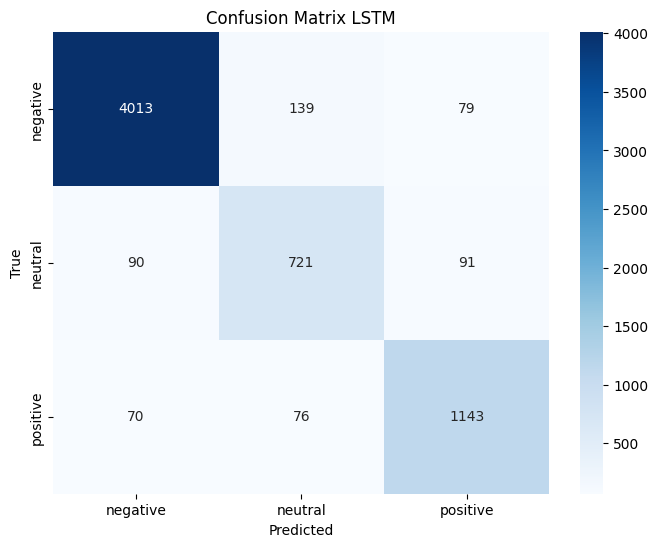

In [32]:
loss_train_lstm, accuracy_train_lstm = model_lstm.evaluate(X_train_lstm, y_train_lstm)
loss_test_lstm, accuracy_test_lstm = model_lstm.evaluate(X_test_lstm, y_test_lstm)
print(f'Train Accuracy LSTM: {accuracy_train_lstm:.2f} %')
print(f'Test Accuracy LSTM: {accuracy_test_lstm:.2f} %')

y_pred_prob_lstm = model_lstm.predict(X_test_lstm)
y_pred_lstm = np.argmax(y_pred_prob_lstm, axis=1)
y_true_lstm = np.argmax(y_test_lstm, axis=1)

print("\nClassification Report LSTM:")
print(classification_report(y_true_lstm, y_pred_lstm, target_names=le.classes_))

cm = confusion_matrix(y_true_lstm, y_pred_lstm)
print("Confusion Matrix LSTM:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix LSTM")
plt.show()

536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9885 - loss: 0.0341
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9104 - loss: 0.3638
Train Accuracy CNN: 0.98 %
Test Accuracy CNN: 0.91 %
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Classification Report CNN:
              precision    recall  f1-score   support

    negative       0.97      0.95      0.96      2821
     neutral       0.70      0.87      0.77       601
    positive       0.93      0.83      0.88       859

    accuracy                           0.91      4281
   macro avg       0.86      0.88      0.87      4281
weighted avg       0.92      0.91      0.92      4281

Confusion Matrix CNN:
[[2667  128   26]
 [  51  524   26]
 [  42  101  716]]


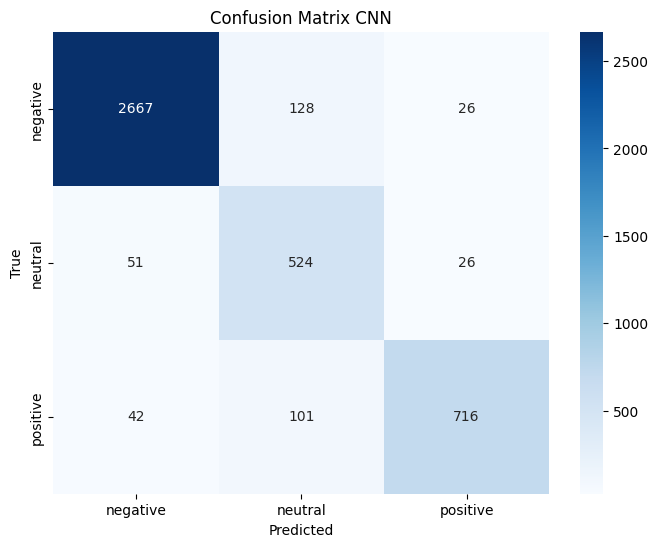

In [33]:
loss_train_cnn, accuracy_train_cnn = model_cnn.evaluate(X_train_cnn, y_train_cnn)
loss_test_cnn, accuracy_test_cnn = model_cnn.evaluate(X_test_cnn, y_test_cnn)
print(f'Train Accuracy CNN: {accuracy_train_cnn:.2f} %')
print(f'Test Accuracy CNN: {accuracy_test_cnn:.2f} %')

y_pred_prob_cnn = model_cnn.predict(X_test_cnn)
y_pred_cnn = np.argmax(y_pred_prob_cnn, axis=1)
y_true_cnn = np.argmax(y_test_cnn, axis=1)

print("\nClassification Report CNN:")
print(classification_report(y_true_cnn, y_pred_cnn, target_names=le.classes_))

cm = confusion_matrix(y_true_cnn, y_pred_cnn)
print("Confusion Matrix CNN:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix CNN")
plt.show()

536/536 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9876 - loss: 0.0397
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9033 - loss: 0.3096
Train Accuracy LSTMW: 0.98 %
Test Accuracy LSTMW: 0.91 %
134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step

Classification Report LSTMW:
              precision    recall  f1-score   support

    negative       0.96      0.95      0.95      2821
     neutral       0.75      0.83      0.78       601
    positive       0.89      0.84      0.86       859

    accuracy                           0.91      4281
   macro avg       0.86      0.87      0.87      4281
weighted avg       0.91      0.91      0.91      4281

Confusion Matrix LSTMW:
[[2672   91   58]
 [  68  497   36]
 [  56   79  724]]


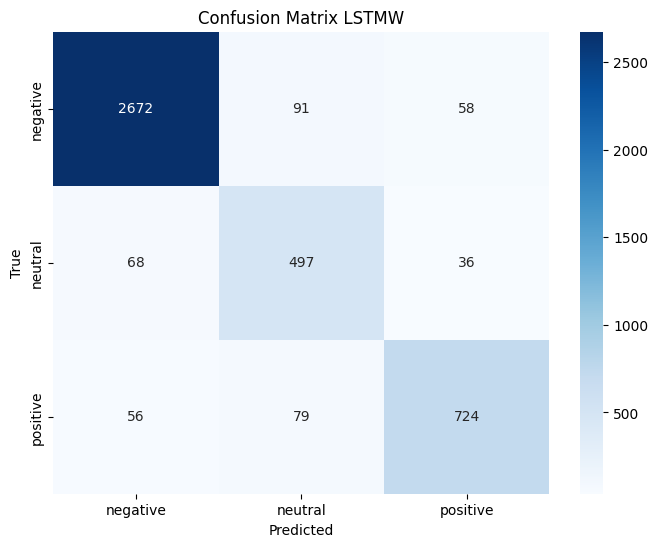

In [34]:
loss_train_lstmw, accuracy_train_lstmw = model_lstmw.evaluate(X_train_lstmw, y_train_lstmw)
loss_test_lstmw, accuracy_test_lstmw = model_lstmw.evaluate(X_test_lstmw, y_test_lstmw)
print(f'Train Accuracy LSTMW: {accuracy_train_lstmw:.2f} %')
print(f'Test Accuracy LSTMW: {accuracy_test_lstmw:.2f} %')

y_pred_prob_lstmw = model_lstmw.predict(X_test_lstmw)
y_pred_lstmw = np.argmax(y_pred_prob_lstmw, axis=1)
y_true_lstmw = np.argmax(y_test_lstmw, axis=1)

print("\nClassification Report LSTMW:")
print(classification_report(y_true_lstmw, y_pred_lstmw, target_names=le.classes_))

cm = confusion_matrix(y_true_lstmw, y_pred_lstmw)
print("Confusion Matrix LSTMW:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix LSTMW")
plt.show()

## **7. Inference (Testing)**

In [35]:
text_input = "benerin tuh jaringan ngeleg bett mahal doang"

def preprocess_text(text, tokenizer, max_len=100):
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=max_len, padding='post', truncating='post')
    return padded

processed_text = preprocess_text(text_input, tokenizer, max_len)

pred_lstm   = model_lstm.predict(processed_text)
pred_cnn    = model_cnn.predict(processed_text)
pred_lstmw  = model_lstmw.predict(processed_text)

class_lstm   = np.argmax(pred_lstm, axis=1)
class_cnn    = np.argmax(pred_cnn, axis=1)
class_lstmw  = np.argmax(pred_lstmw, axis=1)

sentiment_lstm   = le.inverse_transform(class_lstm)[0]
sentiment_cnn    = le.inverse_transform(class_cnn)[0]
sentiment_lstmw  = le.inverse_transform(class_lstmw)[0]

print(f"Model LSTM: {sentiment_lstm}")
print(f"Model CNN: {sentiment_cnn}")
print(f"Model LSTM Word2Vec: {sentiment_lstmw}")

votes = [sentiment_lstm, sentiment_cnn, sentiment_lstmw]
final_sentiment = max(set(votes), key=votes.count)
print(f"Final Sentimen (Voting): {final_sentiment}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Model LSTM: neutral
Model CNN: neutral
Model LSTM Word2Vec: neutral
Final Sentimen (Voting): neutral


In [37]:
print("Index for 'lemot':", tokenizer.word_index.get("lemot"))

Index for 'lemot': 6
